In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext("local")
spark = SparkSession.builder.getOrCreate()

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np

# Simple linear regression
Linear regression with only a slope, also known as simple linear regression, is a statistical technique used to model the relationship between a dependent variable and an independent variable when the relationship can be approximated by a straight line. In this case, we are considering a linear regression model with a single predictor variable and no intercept term.

To perform linear regression with only a slope, we need a set of paired observations (x, y), where x represents the independent variable (predictor) and y represents the dependent variable (response). The goal is to estimate the slope of the line that best fits the data points.

The formula for the simple linear regression model is:

$$y = \beta \cdot x + \epsilon$$

where:
- y is the dependent variable
- x is the independent variable
- β is the slope of the line
- ε is the error term representing the random variation or noise in the data

## Generate data

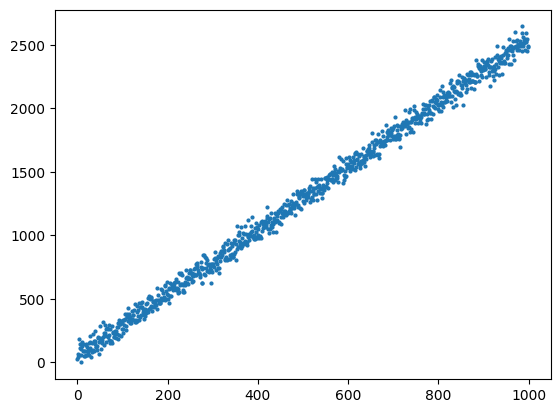

In [3]:
# Let us create some random data
size= 1000
mu, sigma = 50, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, size)
x1 = np.arange(0, size)
y = 2.5*x1 + error
plt.plot(x1, y, 'o', markersize=2)
plt.show()

In [4]:
myRDD = sc.parallelize(zip(y,x1))
myRDD.take(5)

[(30.00247643264563, 0),
 (62.595739264535716, 1),
 (45.028487269573084, 2),
 (181.08219640423675, 3),
 (57.7336495713452, 4)]

## Calculating the slope using sklearn. 
The fit() method returns an instance of the LinearRegression class, which contains the slope of the line in its coef_ attribute.

In [5]:
from sklearn.linear_model import LinearRegression

X = np.stack([x1], axis=1)
reg = LinearRegression(fit_intercept=False).fit(X, y)
print(reg.coef_)

[2.57016918]


## Calculating the slope using linear algebra.
Calculate the coefficients of a linear regression model using the normal equation approach

$$
\hat{\beta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

Where:
- $\hat{\beta}$ represents the estimated coefficients of the linear regression model.
- $X$ is the matrix of input variables.
- $X^T$ denotes the transpose of $X$.
- $y$ is the vector of dependent variable values.
- $(X^T \cdot X)^{-1}$ represents the inverse of the matrix product $X^T \cdot X$.

In [6]:
# Let use solve this also with the exact linear algebra solution. 
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(beta_hat)

[2.57016918]


## Calculating the slope using gradient descent
Gradient descent is an iterative optimization algorithm used to find the minimum value of a function. In the context of machine learning, we can use gradient descent to find the optimal values of the coefficients in a parameterized model.

1. Calculation of the prediction with current regression coefficients:
   - Prediction: $y_{\text{prediction}} = m_{\text{current}} \cdot x_1$

2. Computation of the cost (for monitoring purposes):
   - Cost: $cost = \frac{-1}{2n} \sum (y - y_{\text{prediction}})^2$

3. Calculation of the gradient:

$$
\begin{align*}
m_{\text{gradient}} & = \frac{\partial }{\partial m} \left(\frac{-1}{2n} \sum (y - mx)^2 \right) \\
& = \frac{-1}{2n}\sum \frac{\partial }{\partial m} (y - mx)^2 \\
& = \frac{-1}{2n}\sum 2(y - mx)(-x) \\
& = \frac{-1}{n} \sum x(y - mx) \\
\end{align*}
$$

   The final formula for gradient is: $m_{\text{gradient}} = \frac{-1}{n} \sum (x \cdot (y - mx))$

4. Update of the regression coefficient:
   - Updated coefficient: $m_{\text{current}} = m_{\text{current}} - \text{learningRate} \cdot m_{\text{gradient}}$

Here, the variable $n$ represents the number of data points in the dataset, $y$ is the dependent variable, $x_1$ is the independent variable, $m_{\text{current}}$ is the current value of the coefficient, and $\text{learningRate}$ is the learning rate (step size) used in the gradient descent algorithm.

In [7]:
# Now, we do gradient descent here with a very simple numpy array 
learningRate = 0.000001
num_iteration = 30 
m_current=0
n = float(size)

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x1 
    # We compute costs just for monitoring 
    cost= sum (( y - y_prediction)**2)/size
    # calculate gradients. 
    m_gradient = (-1/n) * sum (x1 * (y - y_prediction) )
    print(i , "m=", m_current, " Cost=", cost)
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient 

0 m= 0  Cost= 2201628.135977606
1 m= 0.8554384021854295  Cost= 981637.6039541787
2 m= 1.4261582469370757  Cost= 438606.2290148655
3 m= 1.806923408240575  Cost= 196896.91535371984
4 m= 2.060957168229366  Cost= 89309.40751023324
5 m= 2.230439982762928  Cost= 41421.00938172994
6 m= 2.3435132389454334  Cost= 20105.34995916749
7 m= 2.4189519275163187  Cost= 10617.512520975035
8 m= 2.4692820933347464  Cost= 6394.370394849577
9 m= 2.5028606939082465  Cost= 4514.602794103958
10 m= 2.5252632113277667  Cost= 3677.897296802886
11 m= 2.540209420465737  Cost= 3305.4703601240412
12 m= 2.5501810305045844  Cost= 3139.6989822480787
13 m= 2.5568337546735673  Cost= 3065.9122954741506
14 m= 2.561272229372853  Cost= 3033.069019301669
15 m= 2.564233431003314  Cost= 3018.4501112451594
16 m= 2.5662090455309032  Cost= 3011.943072433252
17 m= 2.567527109360624  Cost= 3009.0467169779768
18 m= 2.568406477392675  Cost= 3007.75751690313
19 m= 2.5689931622848308  Cost= 3007.1836795897816
20 m= 2.5693845787909333  Co

## Calculating the slope using gradient descent in PySpark
- `myRDD` contains tuples $(y,x)$ with the dependent variable $y$ as the first element `t[0]` and the independent variable $x$ as the second element `t[1]`. 
- `size` represents the size of the RDD
- `learningRate` represents the learning rate (step size) used in the gradient descent algorithm.
- `beta` represents the current value of the coefficient.
- `gradient` represents the gradient of the cost function.
- `cost` represents the cost of the current loss function.

The formula for the gradient calculation is: 

$m_{\text{gradient}} = \frac{-1}{n} \sum (x \cdot (y - mx))$

$cost = \frac{-1}{2n} \sum (y - y_{\text{prediction}})^2 =\frac{-1}{2n} \sum (y - mx)^2$

In [8]:
myRDD.take(5)

[(30.00247643264563, 0),
 (62.595739264535716, 1),
 (45.028487269573084, 2),
 (181.08219640423675, 3),
 (57.7336495713452, 4)]

### Simple implementation in pySpark using exact formula

In [9]:
# Now we do gradient Decent on our RDD data set. 
learningRate = 0.000001
num_iteration = 30 

m = 0
myRDD.cache()

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):

    gradientCost=myRDD.map(lambda x: (x[1]*(x[0] - x[1] * m) , (x[0] - x[1] * m)**2))\
                        .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientCost[1]/(2*size)
    gradient=(-1.0/float(size))* gradientCost[0]
    print(i, "m", m, " Cost", cost)
    m = m - learningRate * gradient    

0 m 0  Cost 1100814.067988803
1 m 0.8554384021854295  Cost 490818.8019770894
2 m 1.4261582469370757  Cost 219303.11450743274
3 m 1.806923408240575  Cost 98448.45767685992
4 m 2.060957168229366  Cost 44654.70375511662
5 m 2.230439982762928  Cost 20710.50469086497
6 m 2.3435132389454334  Cost 10052.674979583746
7 m 2.4189519275163187  Cost 5308.7562604875175
8 m 2.4692820933347464  Cost 3197.1851974247884
9 m 2.5028606939082465  Cost 2257.301397051979
10 m 2.5252632113277667  Cost 1838.948648401443
11 m 2.540209420465737  Cost 1652.7351800620206
12 m 2.5501810305045844  Cost 1569.8494911240393
13 m 2.5568337546735673  Cost 1532.9561477370753
14 m 2.561272229372853  Cost 1516.5345096508345
15 m 2.564233431003314  Cost 1509.2250556225797
16 m 2.5662090455309032  Cost 1505.971536216626
17 m 2.567527109360624  Cost 1504.5233584889884
18 m 2.568406477392675  Cost 1503.878758451565
19 m 2.5689931622848308  Cost 1503.5918397948908
20 m 2.5693845787909333  Cost 1503.4641291048952
21 m 2.56964571

### Optimization of the code 
We can do a small optimization by calculating only once the $t=(y - mx)$ expression that is part of the gradient and cost calculation, and then we can use it in both calculations in the second map step.
The formula for the gradient calculation is: 

$m_{\text{gradient}} = \frac{-1}{n} \sum (x \cdot t)$

$cost = \frac{-1}{2n} \sum (y - y_{\text{prediction}})^2 =\frac{-1}{2n} \sum (t)^2$

In [10]:
myRDD.take(5)

[(30.00247643264563, 0),
 (62.595739264535716, 1),
 (45.028487269573084, 2),
 (181.08219640423675, 3),
 (57.7336495713452, 4)]

In [11]:
# Now we do gradient Decent on our RDD data set. 
learningRate = 0.000001
num_iteration = 30 

m = 0
myRDD.cache()

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
  
    gradientCost=myRDD.map(lambda x: (x[1], (x[0] - x[1] * m) ))\
                        .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                        .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientCost[1]/(size)
    gradient=(-1.0/float(size))* gradientCost[0]
    print(i, "m", m, " Cost", cost)
    m = m - learningRate * gradient    

0 m 0  Cost 2201628.135977606
1 m 0.8554384021854295  Cost 981637.6039541787
2 m 1.4261582469370757  Cost 438606.2290148655
3 m 1.806923408240575  Cost 196896.91535371984
4 m 2.060957168229366  Cost 89309.40751023324
5 m 2.230439982762928  Cost 41421.00938172994
6 m 2.3435132389454334  Cost 20105.34995916749
7 m 2.4189519275163187  Cost 10617.512520975035
8 m 2.4692820933347464  Cost 6394.370394849577
9 m 2.5028606939082465  Cost 4514.602794103958
10 m 2.5252632113277667  Cost 3677.897296802886
11 m 2.540209420465737  Cost 3305.4703601240412
12 m 2.5501810305045844  Cost 3139.6989822480787
13 m 2.5568337546735673  Cost 3065.9122954741506
14 m 2.561272229372853  Cost 3033.069019301669
15 m 2.564233431003314  Cost 3018.4501112451594
16 m 2.5662090455309032  Cost 3011.943072433252
17 m 2.567527109360624  Cost 3009.0467169779768
18 m 2.568406477392675  Cost 3007.75751690313
19 m 2.5689931622848308  Cost 3007.1836795897816
20 m 2.5693845787909333  Cost 3006.9282582097903
21 m 2.569645718771